# Part 1:  Simple linear regression for one independent variable

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the class demo on simple linear regression for an automobile dataset.  The lab use the Ames Housing dataset which is a commonly used machine learning data set for illustrating basic concepts.  

In [37]:
# from google.colab import drive
# drive.mount('/content/drive')

## Loading the data

The Ames housing data set was collected in 2011 and contains information about home sales in Ames, Iowa, including the sale price and numerical and categorical information about each home. We have constructed a "reduced" version of the dataset that is available at:

https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv.

More information about the meaning of each column can be found here: https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf. Note that our version of the dataset contains a subset of the columns in the original dataset and the last column, SalesPrice, is in units of 1000s of US dollars in our version.

In the lab, you will complete all the code marked `TODO`.

First, complete the following code that uses the `pd.read_csv` command to read the data from the file linked above.

In [38]:
import pandas as pd
import numpy as np
# TODO:  Complete the code
df = pd.read_csv("AmesHousing.csv")

Display the first six rows of the data frame

In [39]:
df.head(6)

,Lot Area,Year Built,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice
0,31770,1960,441.0,1080.0,1656,0,1656,1,0,3,7,2,2.0,528.0,215.0
1,11622,1961,270.0,882.0,896,0,896,1,0,2,5,0,1.0,730.0,105.0
2,14267,1958,406.0,1329.0,1329,0,1329,1,1,3,6,0,1.0,312.0,172.0
3,11160,1968,1045.0,2110.0,2110,0,2110,2,1,3,8,2,2.0,522.0,244.0
4,13830,1997,137.0,928.0,928,701,1629,2,1,3,6,1,2.0,482.0,189.9
5,9978,1998,324.0,926.0,926,678,1604,2,1,3,7,1,2.0,470.0,195.5


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [40]:
print (f"The data has", df.shape[0], "rows/samples")
print (f"The data has", df.shape[1], "columns/attributes ")

The data has 2930 rows/samples
The data has 15 columns/attributes 


In [41]:
print (f"num samples = ", df.shape[0])
print (f"num attributes = ", df.shape[1])

num samples =  2930
num attributes =  15


The dataset contains some NaN value. Before proceeding, drop all rows from the dataframe with NaN values. There should only be a few.

In [42]:
# TODO

print ( f"Total null values BEFORE: ", df.isna().sum().sum())
print ("Removing Cols with null values")
df.dropna(inplace = True)
print ( f"Total null values AFTER: ", df.isna().sum().sum())


Total null values BEFORE:  4
Removing Cols with null values
Total null values AFTER:  0


####

Create a response vector `y` with the values in the column `SalePrice`.  The vector `y` should be a 1D `numpy.ndarray` structure.

In [43]:
# TODO
x = df.drop(columns= "SalePrice")
y = df["SalePrice"].to_numpy()

In [44]:
y.dtype


dtype('float64')

Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $120k. Print and label your results.

In [45]:
print (f"The mean house price is ${(y.mean() * 1000).round(2)}")

The mean house price is $180841.03


In [46]:
# abc = np.where(y > 120)
# abc
# y[0:5]

# !pd.value_counts(np.where( y > 120)).sum()

In [47]:
np.sum(y > 120)

2392

In [48]:
fraction = (np.sum(y > 120)/ len(y))
fraction

0.8169398907103825

In [49]:
print (f"Fraction of houses over 120k is = {fraction * 100:.4f}%")

Fraction of houses over 120k is = 81.6940%


In [50]:
# TODO

## Visualizing the Data

Load the `matplotlib` package with the following commands.

In [51]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [52]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `TotRms AbvGrd` column, which represents the total number of non-basement rooms in the home.

In [53]:
# TODO
x_floor = x["TotRms AbvGrd"].to_numpy()

In [54]:
x_floor.dtype

dtype('int64')

Create a scatter plot of the price vs. the `TotRms AbvGrd` attribute.  Label the axes with reasonable labels so that someone else can understand the plot.

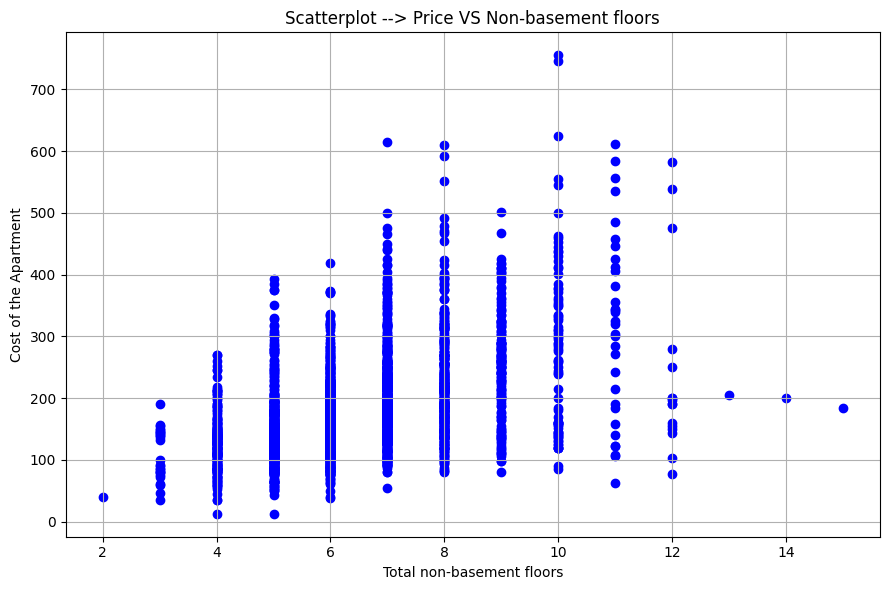

In [55]:
# TODO

plt.figure(figsize = (9, 6))
plt.scatter (x_floor, y, color = 'blue')
plt.xlabel("Total non-basement floors")
plt.ylabel("Cost of the Apartment")
plt.title("Scatterplot --> Price VS Non-basement floors")
plt.grid(True)
plt.tight_layout()
plt.show()

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit under the squared loss function. Use the formulae given in the class to compute the optimal parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x$$ as well as the optimal loss $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$.

In [56]:
# # x_floor
# a = np.array([1, 2, 3, 6])
# b = np.array([4, 5, 6])
# aa = 2
# bb = 5

# np.sum( (a - aa) ** 2)

In [57]:
x_floor

array([7, 5, 6, ..., 6, 6, 9])

In [58]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       y = beta0 + beta1*x,
    The function returns beta0, beta1, and loss, where loss is the sum-of-squares loss of.
    """

    n = len(x)
    x_bar = x.mean()
    y_bar = y.mean()

    B1_numerator = np.sum(   (x - x_bar) * (y - y_bar)   )
    B1_denominator = np.sum(  (x - x_bar) ** 2  )

    beta_1 = B1_numerator / B1_denominator
    beta_0 = y_bar - (beta_1 * x_bar)
    y_pred = beta_0 + beta_1 * x


    # Both the loss function are same --> Difference is 'y_pred' formula is substituted in the second formula

    loss = np.sum(  (y - y_pred) ** 2    )
    # loss = np.sum(  (y - beta_0 - beta_1 * x) ** 2 )



    return beta_0, beta_1, loss

In [59]:
# def fit_linear(x,y):
#     """
#     Given vectors of data points (x,y), performs a fit for the linear model:
#        y = beta0 + beta1*x,
#     The function returns beta0, beta1, and loss, where loss is the sum-of-squares loss of.
#     """
#     # TODO complete the following code

#     # beta0 = ...
#     # beta1 = ...
#     # loss = ...
#     return beta0, beta1, loss

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `loss` for the linear model of price vs. number of rooms.

In [60]:
# TODO
beta0, beta1, loss = 0.0, 0.0, 0.0

beta0, beta1, loss = fit_linear(x_floor, y)

print (f"beta0: {beta0}, beta1: {beta1}, loss: {loss} ")

beta0: 18.78067695087958, beta1: 25.149073822759416, loss: 14101634.9287433 


Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `yp` that are the predicted values for each value in `x`, according to our linear model. Plot as a line, not a scatter plot.

In [61]:
# TODO

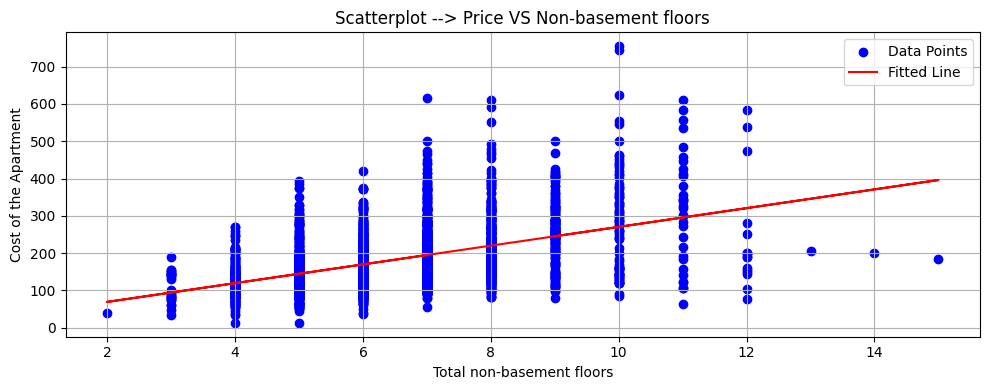

In [62]:
y_pred_plot = beta0 + beta1*x_floor

plt.figure(figsize = (10, 4))
plt.scatter (x_floor, y, color = 'blue', label = "Data Points")
plt.plot(x_floor, y_pred_plot, color = 'red', label = 'Fitted Line')


plt.xlabel("Total non-basement floors")
plt.ylabel("Cost of the Apartment")
plt.title("Scatterplot --> Price VS Non-basement floors")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




# Part 2:  Compare different dependent variables


We next compute the squared loss for all the predictors and output the values in a table. Your table should look like the following, where each entry in the first column is the attribute name and the second column is the squared loss.

    Lot Area           XXXXX
    Overall Qual       XXXXX
    Overall Cond       XXXXX
    ...         ...

You will need to write a loop to perform this task.

What variable does the best job predicting house price?

In [63]:
x


,Lot Area,Year Built,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area
0,31770,1960,441.0,1080.0,1656,0,1656,1,0,3,7,2,2.0,528.0
1,11622,1961,270.0,882.0,896,0,896,1,0,2,5,0,1.0,730.0
2,14267,1958,406.0,1329.0,1329,0,1329,1,1,3,6,0,1.0,312.0
3,11160,1968,1045.0,2110.0,2110,0,2110,2,1,3,8,2,2.0,522.0
4,13830,1997,137.0,928.0,928,701,1629,2,1,3,6,1,2.0,482.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,7937,1984,184.0,1003.0,1003,0,1003,1,0,3,6,0,2.0,588.0
2926,8885,1983,239.0,864.0,902,0,902,1,0,2,5,0,2.0,484.0
2927,10441,1992,575.0,912.0,970,0,970,1,0,3,6,0,0.0,0.0
2928,10010,1974,195.0,1389.0,1389,0,1389,1,0,2,6,1,2.0,418.0


In [64]:
# TODO

loss_list = []
a = 0

for col in x.columns:
    values = x[col].values
    _, _, c = fit_linear( values, y)
    loss_list.append(c)
    # print (f"Loss for column: {col} = {c}")

col_df = pd.DataFrame(x.columns, columns = ['attribiute'])
loss_df = pd.DataFrame(loss_list, columns = ['squared loss'])
loss_table = pd.concat([col_df, loss_df], axis = 1)
loss_table


,attribiute,squared loss
0,Lot Area,1.735555e+07
1,Year Built,1.285760e+07
2,Bsmt Unf SF,1.805704e+07
3,Total Bsmt SF,1.121338e+07
4,1st Flr SF,1.146354e+07
5,2nd Flr SF,1.732564e+07
6,Gr Liv Area,9.349293e+06
7,Full Bath,1.312070e+07
8,Half Bath,1.716632e+07
9,Bedroom AbvGr,1.829628e+07


In [65]:
# values

In [66]:
# 9 349 292
# 18 296 281

**TODO:** Describe in words the meaning of the most predictive variable for housing price.

# Most Predictive Variable:
* The most predictive variable is a variable that has the strongest correlation with the target variable.
* It also means that it will have the least lost among all other features.
* Hence, the most predective variable in our dataset is `Gr Liv Area` with the `LEAST SQUARED LOSS` of `9349292.713520372`

In [67]:

best_feature = loss_table.loc[  loss_table["squared loss"].idxmin()]
print (f"The best Predictive Feature is '{best_feature [0]}' as it has the least loss = {best_feature [1]} ")

The best Predictive Feature is 'Gr Liv Area' as it has the least loss = 9349292.713520372 


# Part 3:  Compare different loss functions

## A Brute force algorithm for squared loss

Your code in `fit_linear` relies on the closed form expressions for the optimal $\beta_0$ and $\beta_1$, which we derived in class. However, if you did not know these formulas, you could have approximately minimized the loss function by brute force searching over a grid of possible values for $\beta_0$ and $\beta_1$.

For example, we could try out all combinations of parameters where $\beta_0$ is in `np.arange(-50,50,.1)` and $\beta_1$ is in `np.arange(-1,1,.005)`

Write a function which takes this approach to find a $\beta_0$ and $\beta_1$ which approximately minimize the squared loss: $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$

In [68]:
# def fit_linear(x,y):
#     Given vectors of data points (x,y), performs a fit for the linear model:
#        y = beta0 + beta1*x,
#     The function returns beta0, beta1, and loss, where loss is the sum-of-squares loss of.

#     n = len(x)
#     x_bar = x.mean()
#     y_bar = y.mean()

#     B1_numerator = np.sum(   (x - x_bar) * (y - y_bar)   )
#     B1_denominator = np.sum(  (x - x_bar) ** 2  )

#     beta_1 = B1_numerator / B1_denominator
#     beta_0 = y_bar - (beta_1 * x_bar)
#     y_pred = beta_0 + beta_1 * x


#     # Both the loss function are same --> Difference is 'y_pred' formula is substituted in the second formula

#     # loss = np.sum(  (y - y_pred) ** 2    )
    # loss = np.sum(  (y - beta_0 - beta_1 * x) ** 2 )



#     return beta_0, beta_1, loss

In [69]:
def fit_approx(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the sum-of-squares loss. The min_loss returned is the lost of the best beta0 and beta1 you found.
    """
    # TODO complete the following code
    best_beta0 = 0
    best_beta1 = 0
    min_loss = np.inf

    # n = len(x)
    # x_bar = x.mean()
    # y_bar = y.mean()

    # B1_numerator = np.sum(   (x - x_bar) * (y - y_bar)   )
    # B1_denominator = np.sum(  (x - x_bar) ** 2  )

    # beta_1 = B1_numerator / B1_denominator
    # beta_0 = y_bar - (beta_1 * x_bar)

    for beta_0 in np.arange(-50,50,.1):
        for beta_1 in np.arange(-1,1,.005):
            loss = np.sum(  (y - beta_0 - beta_1 * x) ** 2 )
            if loss < min_loss:
                min_loss = loss
                best_beta0 = beta_0
                best_beta1 = beta_1



    return best_beta0, best_beta1, min_loss

In [70]:
np.inf

inf

In [71]:
fit_linear(x["Gr Liv Area"], y)

(13.321908483817424, 0.1116954642070349, 9349292.713520372)

In [72]:
fit_approx(x["Gr Liv Area"], y)

(15.900000000000944, 0.11000000000000099, 9351446.560112998)

Compare the output of `fit_approx` and `fit_linear` with `y` being `SalePrice` and `x` being the `Gr Liv Area` variable from our dataset. You should do so:
* quantitatively, by printing the loss that each approach achieves
* and visually, by plotting the different fit lines obtained.

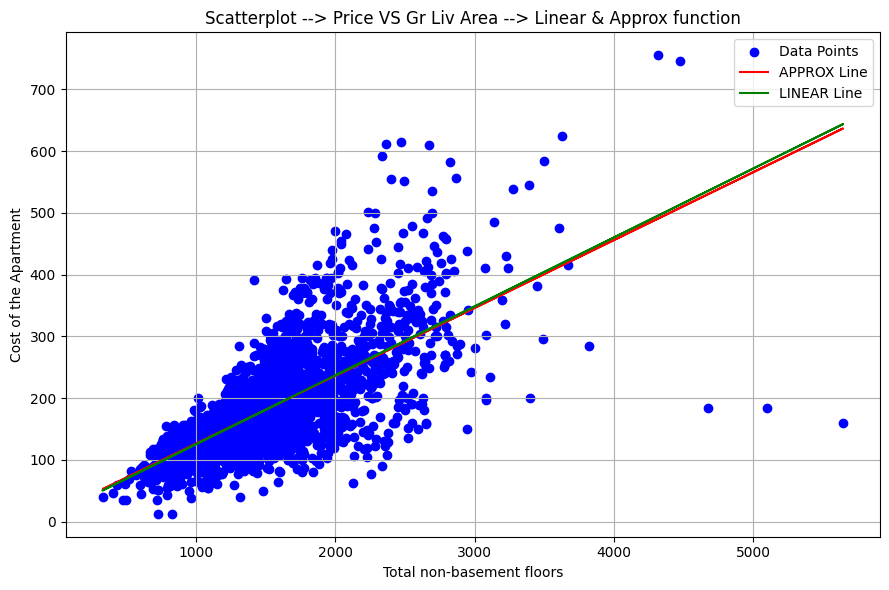

In [73]:
#using direct values from above cells to not get cluttered nomeclature for later stages

y_pred_linear = 13.321908483817424 + 0.1116954642070349 * x["Gr Liv Area"]
y_pred_approx = 15.900000000000944 + 0.11000000000000099 * x["Gr Liv Area"]

plt.figure(figsize = (9, 6))
plt.scatter (x["Gr Liv Area"], y, color = 'blue', label = "Data Points")
plt.plot(x["Gr Liv Area"], y_pred_approx, color = 'red', label = 'APPROX Line')
plt.plot(x["Gr Liv Area"], y_pred_linear, color = 'green', label = 'LINEAR Line')


plt.xlabel("Total non-basement floors")
plt.ylabel("Cost of the Apartment")
plt.title("Scatterplot --> Price VS Gr Liv Area --> Linear & Approx function")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




## Extending to different loss functions

One benefit of the above approach is that is easily extends to different loss funtions. Write functions which find an approximately optimal $\beta_0$ and $\beta_1$ for
* minimizing the $\ell_1$ (least absolute deviations) loss: $\sum_{i=1}^n |y_i - \beta_0 - \beta_1 x|$
* minimizing the $\ell_\infty$ (max) loss: $\max_i |y_i - \beta_0 - \beta_1 x|$


In [74]:
def fit_approx_l1(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the least absolute deviations loss.
    """

    # TODO complete the following code
    # beta0 = ...
    # beta1 = ...
    # min_loss = ...

    best_beta0 = 0
    best_beta1 = 0
    min_loss = np.inf

    for beta_0 in np.arange(-50,50,.1):
        for beta_1 in np.arange(-1,1,.005):
            loss = np.sum(  np.abs(y - beta_0 - beta_1 * x) )
            if loss < min_loss:
                min_loss = loss
                best_beta0 = beta_0
                best_beta1 = beta_1



    return best_beta0, best_beta1, min_loss

In [75]:
def fit_approx_max(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the max loss.
    """
    # TODO complete the following code
    # beta0 = ...
    # beta1 = ...
    # min_loss = ...

    best_beta0 = 0
    best_beta1 = 0
    min_loss = np.inf

    for beta_0 in np.arange(0,50,.1):
        for beta_1 in np.arange(0,1,.005):
            loss = np.max(  np.abs(y - beta_0 - beta_1 * x) )
            if loss < min_loss:
                min_loss = loss
                best_beta0 = beta_0
                best_beta1 = beta_1



    return best_beta0, best_beta1, min_loss

**TODO:** Use your algorithm to obtain 3 different linear fits for `SalePrice` with predictor variable `Gr Liv Area`, one for squared loss, one for $\ell_1$ loss, and one for $\ell_\infty$ loss. Plot the linear fits (along with the data scatter plot) on a single figure and use a legend to indicate which fit corresponds to which loss.

In [76]:
b0_linear, b1_linear, loss_linear = fit_linear(x["Gr Liv Area"], y)
b0_approx, b1_approx, loss_approx = fit_approx(x["Gr Liv Area"], y)
b0_l1, b1_l1, loss_l1 = fit_approx_l1(x["Gr Liv Area"], y)
b0_max, b1_max, loss_max = fit_approx_max(x["Gr Liv Area"], y)

In [77]:
# b0_max, b1_max, loss_max = fit_approx_max(x["Gr Liv Area"], y)

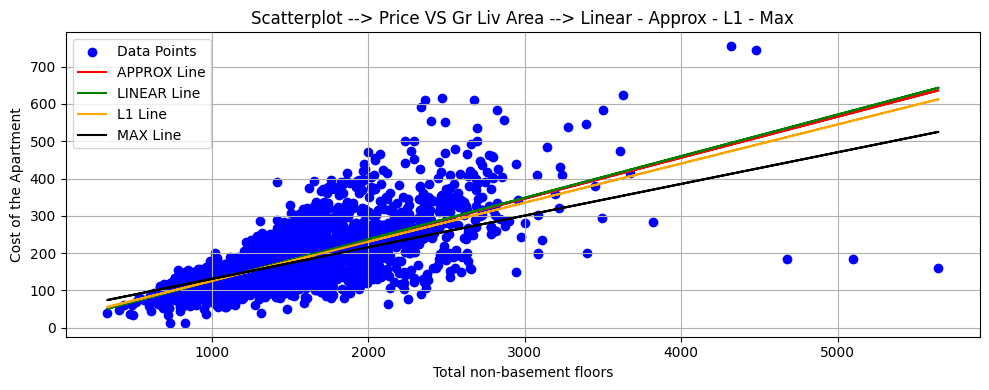

In [78]:
y_pred_linear = b0_linear + b1_linear * x["Gr Liv Area"]
y_pred_approx = b0_approx + b1_approx * x["Gr Liv Area"]
y_pred_l1 = b0_l1 + b1_l1 * x["Gr Liv Area"]
y_pred_max = b0_max + b1_max * x["Gr Liv Area"]

plt.figure(figsize = (10, 4))
plt.scatter (x["Gr Liv Area"], y, color = 'blue', label = "Data Points")

plt.plot(x["Gr Liv Area"], y_pred_approx, color = 'red', label = 'APPROX Line')
plt.plot(x["Gr Liv Area"], y_pred_linear, color = 'green', label = 'LINEAR Line')
plt.plot(x["Gr Liv Area"], y_pred_l1, color = 'orange', label = 'L1 Line')
plt.plot(x["Gr Liv Area"], y_pred_max, color = 'black', label = 'MAX Line')


plt.xlabel("Total non-basement floors")
plt.ylabel("Cost of the Apartment")
plt.title("Scatterplot --> Price VS Gr Liv Area --> Linear - Approx - L1 - Max")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




**TODO:** Repeat the process above for the `Lot Area` predictor variable, which has some more extreme outliers. Note that  this variable has a different scale than `Gr Liv Area` so you might need to adjust your approximate fit functions accordingly.

Again produce a plot that contains three different linear fits for all three different loss functions. Write 1-2 sentences of discussion about how the choice of loss function effected the fit.

In [79]:
x["Lot Area"].describe()

count      2928.000000
mean      10149.730533
std        7882.299902
min        1300.000000
25%        7440.750000
50%        9444.500000
75%       11556.000000
max      215245.000000
Name: Lot Area, dtype: float64

In [80]:
x["Gr Liv Area"].describe()

count    2928.000000
mean     1499.784495
std       505.522007
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.250000
max      5642.000000
Name: Gr Liv Area, dtype: float64

In [81]:
b0_linear, b1_linear, loss_linear = fit_linear(x["Lot Area"], y)
b0_approx, b1_approx, loss_approx = fit_approx(x["Lot Area"], y)
b0_l1, b1_l1, loss_l1 = fit_approx_l1(x["Lot Area"], y)
b0_max, b1_max, loss_max = fit_approx_max(x["Lot Area"], y)

In [82]:
# b0_approx, b1_approx, loss_approx = fit_approx(x["Lot Area"], y)

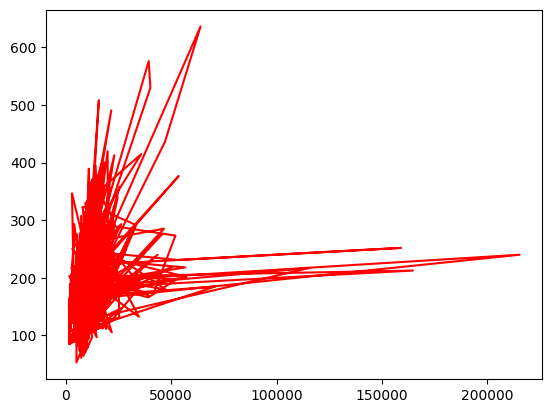

In [83]:
plt.plot(x["Lot Area"], y_pred_approx, color = 'red', label = 'APPROX Line')

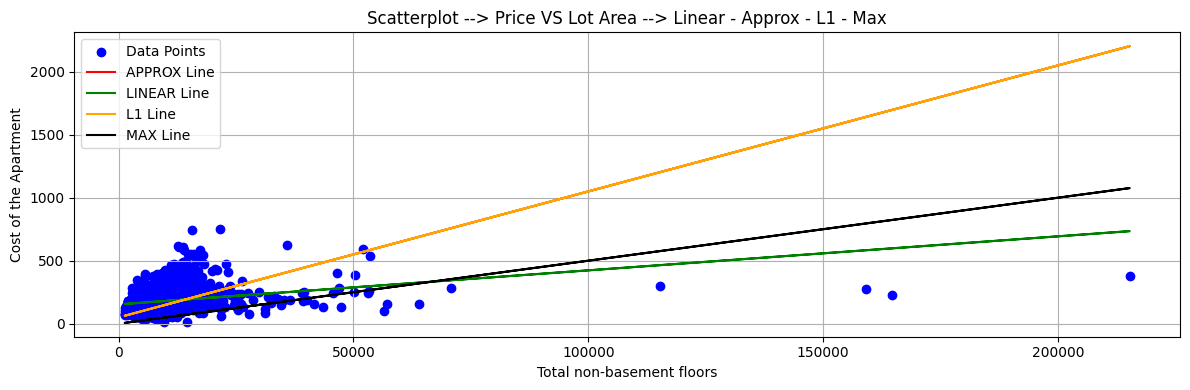

In [84]:
y_pred_linear = b0_linear + b1_linear * x["Lot Area"]
y_pred_approx = b0_approx + b1_approx * x["Lot Area"]
y_pred_l1 = b0_l1 + b1_l1 * x["Lot Area"]
y_pred_max = b0_max + b1_max * x["Lot Area"]

plt.figure(figsize = (12, 4))
plt.scatter (x["Lot Area"], y, color = 'blue', label = "Data Points")

plt.plot(x["Lot Area"], y_pred_approx, color = 'red', label = 'APPROX Line')
plt.plot(x["Lot Area"], y_pred_linear, color = 'green', label = 'LINEAR Line')
plt.plot(x["Lot Area"], y_pred_l1, color = 'orange', label = 'L1 Line')
plt.plot(x["Lot Area"], y_pred_max, color = 'black', label = 'MAX Line')


plt.xlabel("Total non-basement floors")
plt.ylabel("Cost of the Apartment")
plt.title("Scatterplot --> Price VS Lot Area --> Linear - Approx - L1 - Max")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [86]:
print("GG")

GG
